In [1]:
import numpy as np
import pandas as pd

from pandas import read_excel
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
file_name = "field_in_place_volumes.xlsx"
temp_file_1 = read_excel(file_name)
temp_file_1 = temp_file_1.drop(["Unnamed: 0", "Date sync NPD", "Updated date"], axis=1)
temp_file_1 = temp_file_1.set_index("Field name")

file_name = "field_reserves.xlsx"
temp_file_2 = read_excel(file_name)
temp_file_2 = temp_file_2.drop(["Unnamed: 0", "Updated date", "NPDID field", "Date sync NPD"], axis=1)
temp_file_2 = temp_file_2.set_index("Field name")


In [3]:
temp_file_1

,Orig. inplace oil \n[mill Sm3],Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],NPDID field
Field name,,,,,
ALBUSKJELL,56,0,64,0.00,43437
ALVE,3,3,1,13.50,4444332
ALVHEIM,109,0,10,11.69,2845712
ATLA,0,0,0,1.88,21106284
BALDER,263,0,14,0.00,43562
...,...,...,...,...,...
YTTERGRYTA,0,1,0,7.39,4973114
ÆRFUGL,13,0,0,63.00,33310197
ØST FRIGG,0,0,0,21.37,43576


In [4]:
temp_file_2

,Orig. recoverable oil \n[mill Sm3],Orig. recoverable gas \n[bill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],Remaining cond. \n[mill Sm3],Remaining oil eq. \n[mill Sm3 o.e]
Field name,,,,,,,,,,
ALBUSKJELL,7.35,15.53,0.99,0.00,24.761,0.00,0.00,0.00,0.00,0.000
ALVE,2.39,9.08,1.41,0.00,14.149,0.34,2.10,0.28,0.00,2.972
ALVHEIM,51.79,10.06,0.00,0.00,61.850,9.31,4.20,0.00,0.00,13.510
ATLA,0.40,1.40,0.00,0.00,1.800,0.00,0.00,0.00,0.00,0.000
BALDER,106.87,3.25,0.00,0.00,110.120,36.18,1.24,0.00,0.00,37.420
...,...,...,...,...,...,...,...,...,...,...
YTTERGRYTA,0.29,2.22,0.41,0.00,3.289,0.00,0.00,0.00,0.00,0.000
ÆRFUGL,5.90,37.04,4.15,0.00,50.825,4.65,31.61,3.52,0.00,42.948
ØST FRIGG,0.00,9.22,0.00,0.07,9.290,0.00,0.00,0.00,0.00,0.000


In [12]:
main_file = temp_file_1.join(temp_file_2)

In [16]:
cols = list(main_file)
cols[4], cols[0] = cols[0], cols[4]
main_file = main_file.ix[:,cols]

C:\Users\lawso\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
main_file

,NPDID field,Orig. inplace ass. liquid \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. inplace free gas \n[bill Sm3],Orig. inplace oil \n[mill Sm3],Orig. recoverable oil \n[mill Sm3],Orig. recoverable gas \n[bill Sm3],Orig. recoverable NGL \n[mill tonn],Orig. recoverable cond. \n[mill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil \n[mill Sm3],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],Remaining cond. \n[mill Sm3],Remaining oil eq. \n[mill Sm3 o.e]
Field name,,,,,,,,,,,,,,,
ALBUSKJELL,43437,0,64,0.00,56,7.35,15.53,0.99,0.00,24.761,0.00,0.00,0.00,0.00,0.000
ALVE,4444332,3,1,13.50,3,2.39,9.08,1.41,0.00,14.149,0.34,2.10,0.28,0.00,2.972
ALVHEIM,2845712,0,10,11.69,109,51.79,10.06,0.00,0.00,61.850,9.31,4.20,0.00,0.00,13.510
ATLA,21106284,0,0,1.88,0,0.40,1.40,0.00,0.00,1.800,0.00,0.00,0.00,0.00,0.000
BALDER,43562,0,14,0.00,263,106.87,3.25,0.00,0.00,110.120,36.18,1.24,0.00,0.00,37.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YTTERGRYTA,4973114,1,0,7.39,0,0.29,2.22,0.41,0.00,3.289,0.00,0.00,0.00,0.00,0.000
ÆRFUGL,33310197,0,0,63.00,13,5.90,37.04,4.15,0.00,50.825,4.65,31.61,3.52,0.00,42.948
ØST FRIGG,43576,0,0,21.37,0,0.00,9.22,0.00,0.07,9.290,0.00,0.00,0.00,0.00,0.000


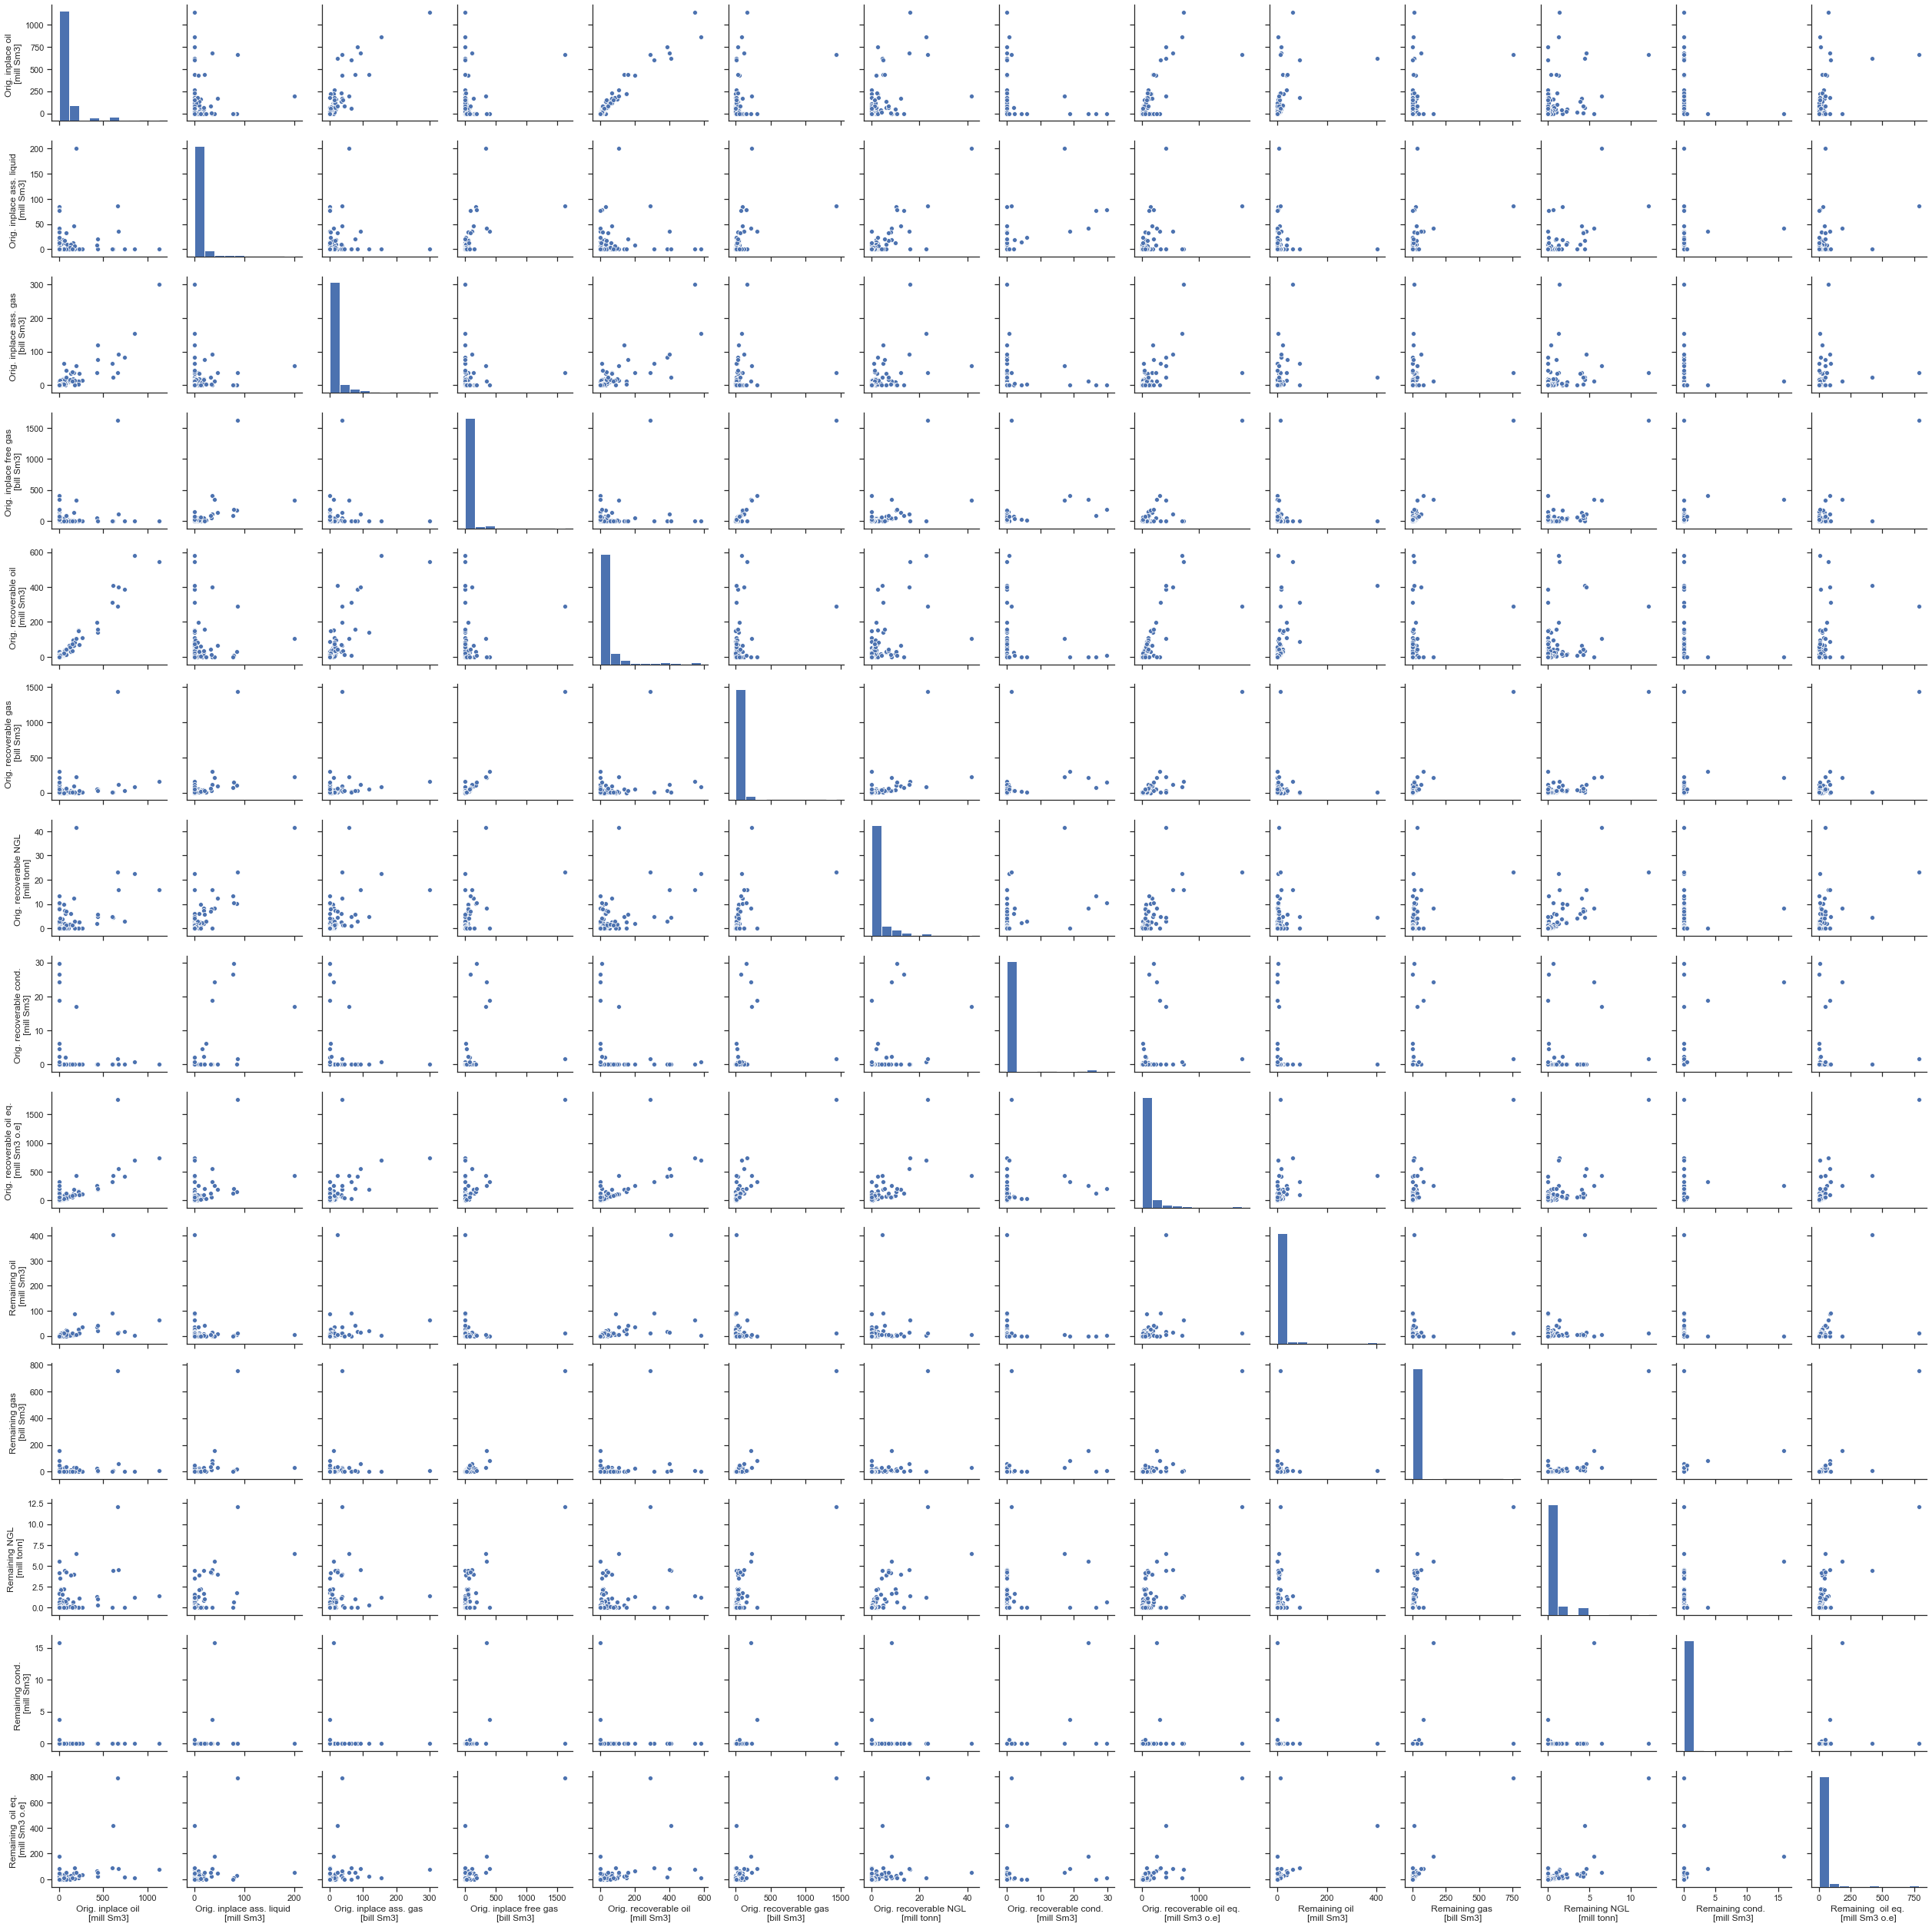

In [62]:
g = sns.pairplot(main_file)